In [7]:
import pandas as pd

In [8]:
df = pd.read_csv("/Users/jiawenli/Desktop/MBAN_6110T/Class_1/messy_data.csv")

In [9]:
df.head()

,Age,Income,Gender,Product,Quantity
0,56,59544.57663,Female,D,3
1,46,36399.18997,Female,NaN,1
2,32,57140.63881,Female,D,2
3,60,69554.91903,Male,C,5
4,25,53173.80518,Female,D,2


In [10]:
# Write a function to find the average income by Gender
df.groupby('Gender')['Income'].agg('mean')

Gender
Female    49644.486259
Male      57219.421148
Name: Income, dtype: float64

In [11]:
df.groupby('Gender')['Income'].mean()

Gender
Female    49644.486259
Male      57219.421148
Name: Income, dtype: float64

In [12]:
# Write a function to calculate the average income by Product
df.groupby('Product')['Income'].mean()

Product
A    51745.423588
B    61486.730790
C    50857.602438
D    49876.379810
Name: Income, dtype: float64

In [13]:
# How many customers purchase each product?
df.groupby('Product')['Age'].count()

Product
A    23
B    25
C    24
D    28
Name: Age, dtype: int64

In [14]:
df['Product'].value_counts()

D    28
B    25
C    24
A    23
Name: Product, dtype: int64

In [15]:
# Find the min, max, mean and median of the Income column
df['Income'].describe()

count        94.000000
mean      52867.862808
std       29896.579420
min       20901.331720
25%       37814.315255
50%       48760.369705
75%       61644.277868
max      300000.000000
Name: Income, dtype: float64

In [16]:
# Find descriptive statistics for Income by Gender
df.groupby('Gender')['Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,54.0,49644.486259,15220.366090,27763.63630,37549.629215,47443.734975,59180.209903,94154.95125
Male,40.0,57219.421148,42222.682325,20901.33172,38144.018710,52807.321410,63330.314347,300000.00000


In [17]:
df.describe(include='all')

,Age,Income,Gender,Product,Quantity
count,105.000000,94.000000,105,100,105.00000
unique,NaN,NaN,2,4,NaN
top,NaN,NaN,Female,D,NaN
freq,NaN,NaN,58,28,NaN
mean,42.076190,52867.862808,NaN,NaN,3.20000
std,15.940813,29896.579420,NaN,NaN,1.44382
min,18.000000,20901.331720,NaN,NaN,1.00000
25%,31.000000,37814.315255,NaN,NaN,2.00000
50%,41.000000,48760.369705,NaN,NaN,3.00000
75%,55.000000,61644.277868,NaN,NaN,5.00000


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Income', ylabel='Count'>

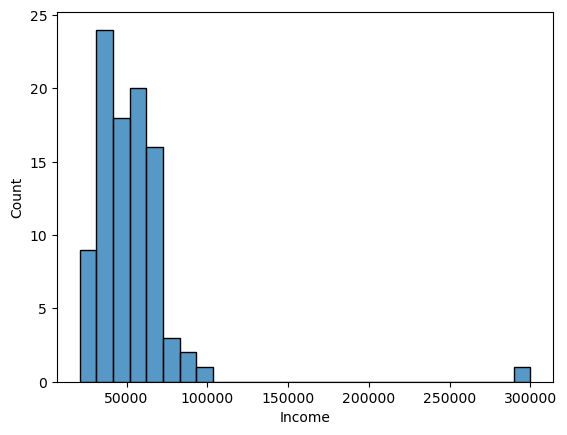

In [19]:
sns.histplot(df['Income']) # plot distribution of income

In [20]:
df[df['Income']>250000]

,Age,Income,Gender,Product,Quantity
99,61,300000.0,Male,B,4


In [21]:
df_noout = df.set_index("Income").drop(300000)

<Axes: xlabel='Income', ylabel='Count'>

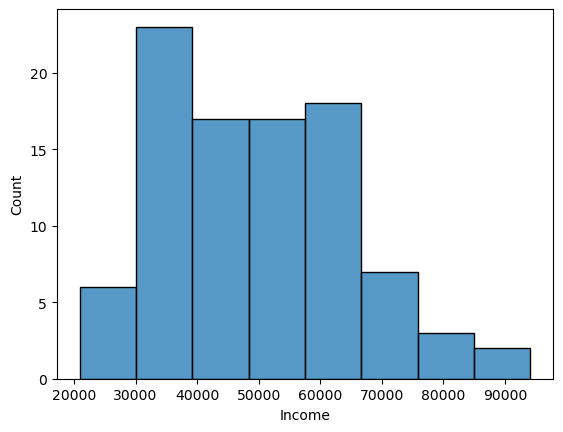

In [22]:
sns.histplot(df_noout.reset_index()['Income'])

<Axes: >

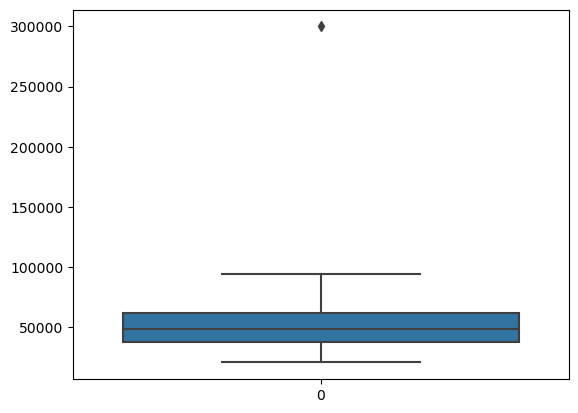

In [23]:
sns.boxplot(df['Income'])

<Axes: xlabel='Gender', ylabel='Income'>

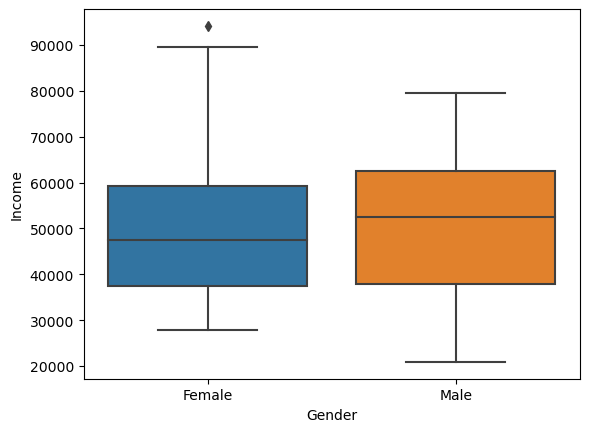

In [24]:
sns.boxplot(data = df_noout.reset_index(),x='Gender',y='Income')

<Axes: xlabel='Product', ylabel='Income'>

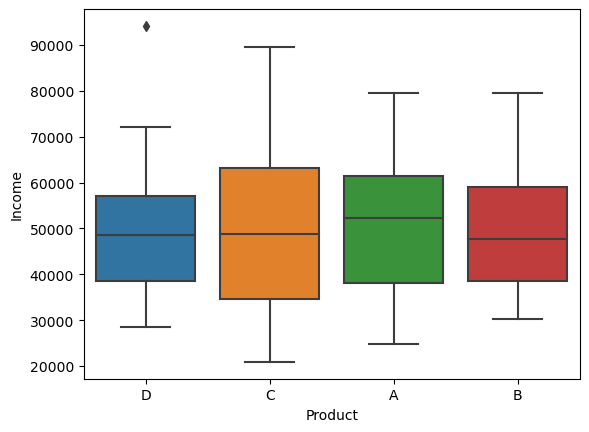

In [25]:
sns.boxplot(data = df_noout.reset_index(),x='Product',y='Income')

In [26]:
# reset index permanently
df_noout.reset_index(inplace=True)

In [27]:
# drop duplicates
df_noout.drop_duplicates(inplace=True)

In [28]:
# filling in missing data
df_noout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Income    89 non-null     float64
 1   Age       99 non-null     int64  
 2   Gender    99 non-null     object 
 3   Product   94 non-null     object 
 4   Quantity  99 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.6+ KB


In [29]:
# fill in missing income data
df_noout.groupby('Gender')['Income'].median()

Gender
Female    48320.18269
Male      50656.55325
Name: Income, dtype: float64

In [30]:
male_clean = df_noout[df_noout['Gender']=='Male'].fillna(50656.55325)

In [31]:
female_clean = df_noout[df_noout['Gender']=='Female'].fillna(48320.18269)

In [32]:
df_clean = pd.concat([male_clean, female_clean],axis=0)

In [33]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 3 to 98
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Income    99 non-null     float64
 1   Age       99 non-null     int64  
 2   Gender    99 non-null     object 
 3   Product   99 non-null     object 
 4   Quantity  99 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.6+ KB


In [34]:
df_noout['Income'] = df_noout['Income'].fillna(df_noout.groupby('Gender')['Income'].transform('median'))

In [35]:
df_noout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Income    99 non-null     float64
 1   Age       99 non-null     int64  
 2   Gender    99 non-null     object 
 3   Product   94 non-null     object 
 4   Quantity  99 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.6+ KB


In [36]:
df_noout['Product'] = df_noout['Product'].fillna('Unknown')

In [37]:
df_noout.dropna(subset='Product',inplace=True) # drop all rows with missing data based on a column

In [38]:
df_noout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Income    99 non-null     float64
 1   Age       99 non-null     int64  
 2   Gender    99 non-null     object 
 3   Product   99 non-null     object 
 4   Quantity  99 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.6+ KB
